In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.optimize import curve_fit

from uncertainties import *
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.umath
import uncertainties

#definitions of the constants
capacitor_distance=0.006 #m
viscosity_air=1.81e-5 #Ns/m^2
density_oil=875 #kg/m^3
density_air=1.29 #kg/m^3
step_value=0.00005 #m
g=9.81 #m/s^2

In [137]:
sns.set_theme(style="ticks")
sns.set_context("talk")

In [138]:
#get data
sinksteig_data=pd.read_csv("Milikan_sinkSteig.csv", header=2)
#extract first 5 test measurements for method
sinksteig_test =sinksteig_data.head(5)
sinksteig_test

,U/V,U_err/V,t1/s,t1_err/s,t2/s,t2_err/s,scale-steps,scale-steps_err
0,504,1,6.122,0.01,3.281,0.01,3,1.732051
1,512,1,6.634,0.01,2.450,0.01,3,1.732051
2,511,1,4.119,0.01,3.400,0.01,3,1.732051
3,511,1,2.525,0.01,0.862,0.01,3,1.732051
4,523,1,2.881,0.01,2.368,0.01,3,1.732051


In [139]:
schweben_data=pd.read_csv("Milikan_Schweben.csv")
schweben_data

,U/V,U_err/V,t/s,t_err/s,s/Skalen,s_err
0,225,1,6.070,0.01,5,2.236068
1,138,1,5.281,0.01,3,1.732051
2,113,1,6.591,0.01,3,1.732051
3,175,1,3.573,0.01,3,1.732051
4,56,1,4.193,0.01,3,1.732051


Assume the droplet is $\textbf{floating}$. Hence we have no friction of air. Thus we have:
$Q=\frac{(\rho_{Oil}-\rho_{Air}) g d}{U} \frac{4\pi r^3}{3}$
But fo that formula we also need the radius of the droplet, that is beeing calculated after the following formula:
$r=\sqrt{\frac{9 \eta s}{2 g t (\rho_{Oil}-\rho_{Air})}}$

[2.344243896943926e-19+/-1.5726117964929619e-19
 2.188980469339739e-19+/-1.895789252353322e-19
 1.9172988570999833e-19+/-1.6605219387527945e-19
 3.101756145302649e-19+/-2.6862896543569227e-19
 7.624649841734001e-19+/-6.604600363784179e-19]


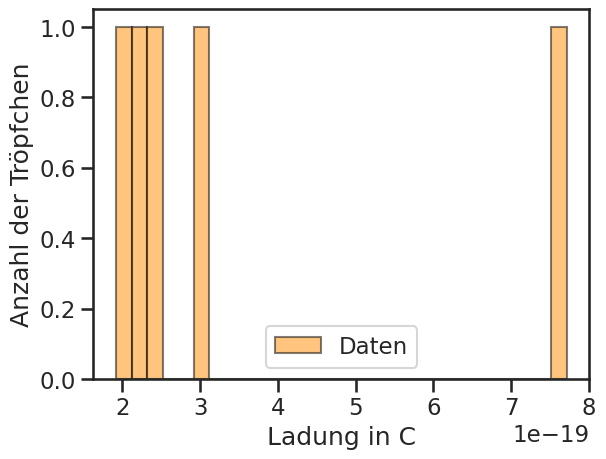

In [140]:
##testing floating method
#defining data for steps and time
s=[]
for i in range(len(schweben_data["s/Skalen"])):
    s.append(ufloat(schweben_data["s/Skalen"][i], schweben_data["s_err"][i]))
s=np.array(s)*step_value
t=[]
for i in range(len(schweben_data["t/s"])):
    t.append(ufloat(schweben_data["t/s"][i], schweben_data["t_err/s"][i]))
t=np.array(t)
U=[]
for i in range(len(schweben_data["U/V"])):
    U.append(ufloat(schweben_data["U/V"][i], schweben_data["U_err/V"][i]))
U=np.array(U)

#r squared
r2=9*s*viscosity_air/(2*g*t*(density_oil-density_air))

#Calculating the charge
Q=(density_oil-density_air)*4/3*np.pi*r2**(3/2)*g*capacitor_distance/U
print(Q)

#plotting
plt.hist([Q[i].n for i in range(len(Q))], color="darkorange", label="Daten", edgecolor="black",
         bins=np.arange(min([Q[i].n for i in range(len(Q))]), max([Q[i].n for i in range(len(Q))]) + 0.2e-19, 0.2e-19),
         alpha=0.5)
plt.xlabel("Ladung in C")
plt.ylabel("Anzahl der Tröpfchen")
plt.legend()
plt.show()

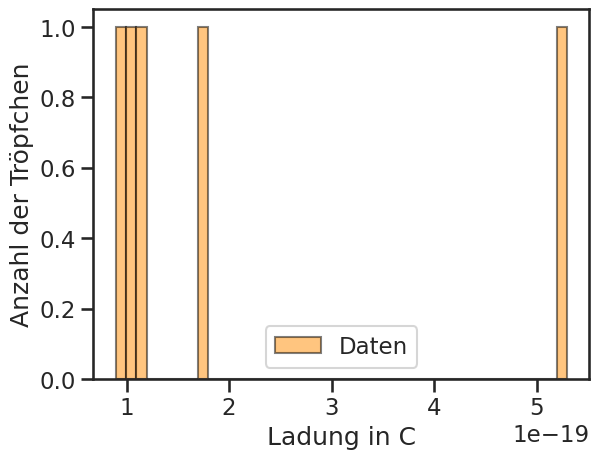

In [141]:
##test ascend/descend method
#defining the data
s=[]
for i in range(len(sinksteig_test["scale-steps"])):
    s.append(ufloat(sinksteig_test["scale-steps"][i], sinksteig_test["scale-steps_err"][i]))
s=np.array(s)*step_value
t1=[]
for i in range(len(sinksteig_test["t1/s"])):
    t1.append(ufloat(sinksteig_test["t1/s"][i], sinksteig_test["t1_err/s"][i]))
t1=np.array(t1)
t2=[]
for i in range(len(sinksteig_test["t2/s"])):
    t2.append(ufloat(sinksteig_test["t2/s"][i], sinksteig_test["t2_err/s"][i]))
t2=np.array(t2)
U=[]
for i in range(len(sinksteig_test["U/V"])):
    U.append(ufloat(sinksteig_test["U/V"][i], sinksteig_test["U_err/V"][i]))
U=np.array(U)

#calculating the velocities
v1=s/t1
v2=s/t2

r2=9*s*viscosity_air/(2*g*t1*(density_oil-density_air))
r=r2**(1/2)
Q=capacitor_distance/U*((density_oil-density_oil)*4/3*np.pi*r**3*g+6*np.pi*r*viscosity_air*v2)
plt.hist([Q[i].n for i in range(len(Q))], color="darkorange", label="Daten", edgecolor="black",
         bins=np.arange(min([Q[i].n for i in range(len(Q))]), max([Q[i].n for i in range(len(Q))]) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.xlabel("Ladung in C")
plt.ylabel("Anzahl der Tröpfchen")
plt.legend()
plt.show()

Calculation of the elementary charge through ascend/descend method. 

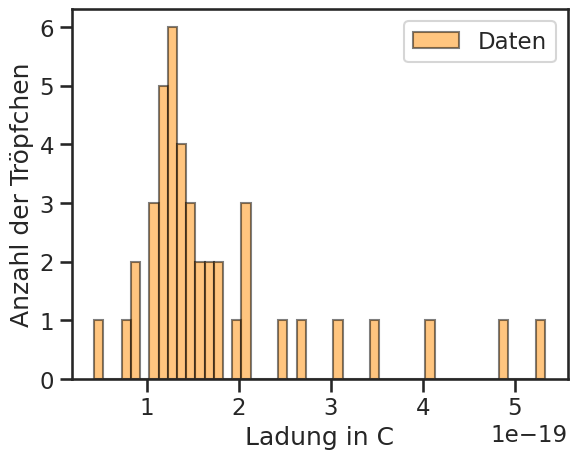

In [142]:
#defining the data
s=[]
for i in range(len(sinksteig_data["scale-steps"])):
    s.append(ufloat(sinksteig_data["scale-steps"][i], sinksteig_data["scale-steps_err"][i]))
s=np.array(s)*step_value
t1=[]
for i in range(len(sinksteig_data["t1/s"])):
    t1.append(ufloat(sinksteig_data["t1/s"][i], sinksteig_data["t1_err/s"][i]))
t1=np.array(t1)
t2=[]
for i in range(len(sinksteig_data["t2/s"])):
    t2.append(ufloat(sinksteig_data["t2/s"][i], sinksteig_data["t2_err/s"][i]))
t2=np.array(t2)
U=[]
for i in range(len(sinksteig_data["U/V"])):
    U.append(ufloat(sinksteig_data["U/V"][i], sinksteig_data["U_err/V"][i]))
U=np.array(U)

#calculating the velocities
v1=s/t1
v2=s/t2

r2=9*s*viscosity_air/(2*g*t1*(density_oil-density_air))
r=r2**(1/2)
Q=capacitor_distance/U*((density_oil-density_oil)*4/3*np.pi*r**3*g+6*np.pi*r*viscosity_air*v2)
plt.hist([Q[i].n for i in range(len(Q))], color="darkorange", label="Daten", edgecolor="black",
         bins=np.arange(min([Q[i].n for i in range(len(Q))]), max([Q[i].n for i in range(len(Q))]) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.xlabel("Ladung in C")
plt.ylabel("Anzahl der Tröpfchen")
plt.legend()
plt.show()

Three groups of charge were chosen with knowledge about the possible distributions.

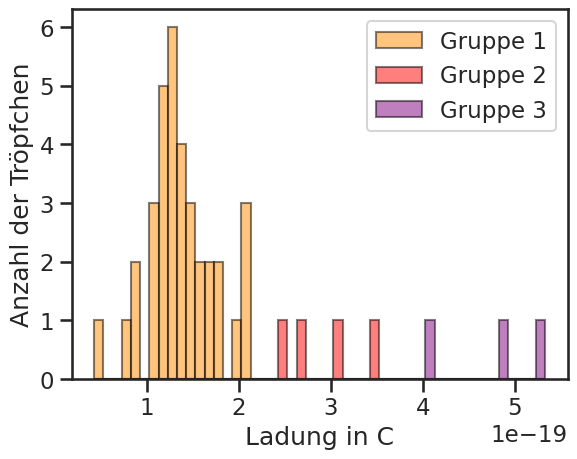

In [143]:
#use Q without errors
Q_ = np.ones(len(Q))
for i in range(len(Q)): 
    Q_[i] = Q[i].n

#determine datapoints in a group and extract them for each group
e1_ind = np.where((Q_ >= 0) & (Q_ < 2.2 * 10**(-19)))
Q_e1 = Q_[e1_ind]
e2_ind = np.where((Q_ >= 2.2 * 10**(-19)) & (Q_ < 3.8 * 10**(-19)))
Q_e2 = Q_[e2_ind]
e3_ind = np.where((Q_ >= 3.8 * 10**(-19)) & (Q_ < 5.5 * 10**(-19)))
Q_e3 = Q_[e3_ind]

plt.hist(Q_e1, color="darkorange", label="Gruppe 1", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.hist(Q_e2, color="red", label="Gruppe 2", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.hist(Q_e3, color="purple", label="Gruppe 3", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.xlabel("Ladung in C")
plt.ylabel("Anzahl der Tröpfchen")
plt.legend()
plt.show()

avg/std: (1.4+/-0.4)e-19 (2.9+/-0.4)e-19 (4.7+/-0.5)e-19


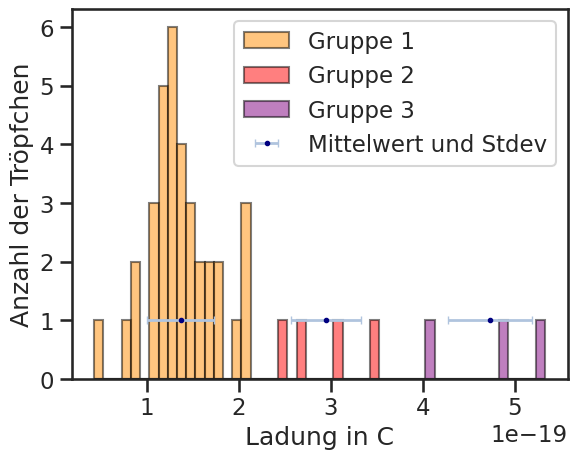

In [144]:
#compute averages and standard deviations for each group
q1 = np.average(Q_e1)
q1_e = np.std(Q_e1)
q_e1 = ufloat(q1, q1_e)

q2 = np.average(Q_e2)
q2_e = np.std(Q_e2)
q_e2 = ufloat(q2, q2_e)

q3 = np.average(Q_e3)
q3_e = np.std(Q_e3)
q_e3 = ufloat(q3, q3_e)

print('avg/std:',q_e1,q_e2,q_e3)

plt.hist(Q_e1, color="darkorange", label="Gruppe 1", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.hist(Q_e2, color="red", label="Gruppe 2", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.hist(Q_e3, color="purple", label="Gruppe 3", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.errorbar(x = np.array([q1,q2,q3]), xerr = np.array([q1_e,q2_e,q3_e]), y = np.array([1,1,1]), 
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Mittelwert und Stdev")
plt.xlabel("Ladung in C")
plt.ylabel("Anzahl der Tröpfchen")
plt.legend()
plt.show()            

vars [2.12147844e-24 9.99986945e-01] covmat [[ 1.38362471e-42 -4.35038569e-19]
 [-4.35038569e-19  1.36784612e+05]]


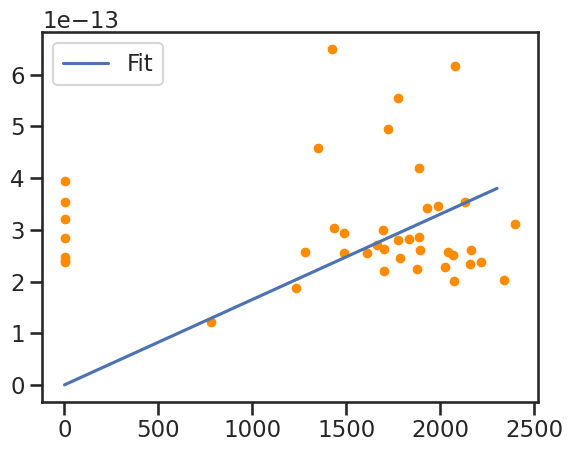

In [146]:
##find correction
#find b and y0
def linfunc(x,y0,b):
    return np.sign(y0) * (np.abs(y0)) ** (2 / 3) * (1+b*x)

Q_f = Q_**(2/3)
p = 1000 #atmosphere is 1000 mbar
x = np.ones(len(r))
r = r[e1_ind]
for i in range(len(r)): 
    x[i] = (r[i].n*1000)**(-1)
vars, covmat = sp.optimize.curve_fit(linfunc,x, Q_f,)
print('vars', vars, 'covmat', covmat)
plt.plot(x,Q_f,'o', ms = 6, color = 'darkorange')
a = np.arange(min(x), max(x), 100)
plt.plot(a, linfunc(a,vars[0], vars[1]), label = 'Fit')
plt.legend()
plt.show()


In [ ]:
x = np.ones(len(r))
for i in range(len(r)): 
    x[i] = (r[i].n*1000)**(-1)
#vars, covmat = sp.optimize.curve_fit(linfunc,x, Q_f,)
print('vars', vars, 'covmat', covmat)
plt.plot(x,Q_f,'o', ms = 6, color = 'darkorange')
#a = np.arange(min(x), max(x), 100)
#plt.plot(a, linfunc(a,vars[0], vars[1]), label = 'Fit')
plt.legend()
plt.show()

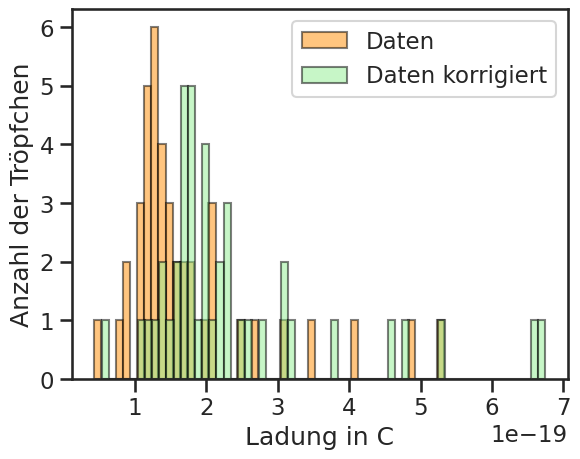

In [127]:
#correct Q
b = vars[1]
K = 1/((1+b*x)**(3/2))
Q_k = Q_ * K


plt.hist(Q_, color="darkorange", label="Daten", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.hist(Q_k, color="lightgreen", label="Daten korrigiert", edgecolor="black",
         bins=np.arange(min(Q_k), max(Q_k) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.xlabel("Ladung in C")
plt.ylabel("Anzahl der Tröpfchen")
plt.legend()
plt.show()

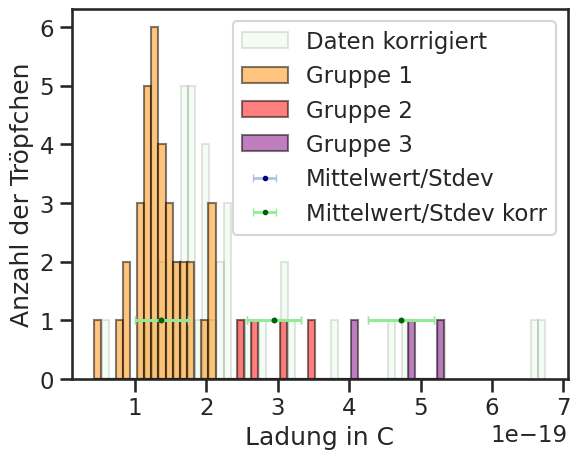

In [130]:

plt.hist(Q_k, color="lightgreen", label="Daten korrigiert", edgecolor="black",
         bins=np.arange(min(Q_k), max(Q_k) + 0.1e-19, 0.1e-19),
         alpha=0.1)
plt.hist(Q_e1, color="darkorange", label="Gruppe 1", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.hist(Q_e2, color="red", label="Gruppe 2", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.hist(Q_e3, color="purple", label="Gruppe 3", edgecolor="black",
         bins=np.arange(min(Q_), max(Q_) + 0.1e-19, 0.1e-19),
         alpha=0.5)
plt.errorbar(x = np.array([q1,q2,q3]), xerr = np.array([q1_e,q2_e,q3_e]), y = np.array([1,1,1]), 
             markersize=6, fmt=".",color="navy", ecolor="lightsteelblue", elinewidth=2, capsize=3, label="Mittelwert/Stdev")
plt.errorbar(x = np.array([q1,q2,q3]), xerr = np.array([q1_e,q2_e,q3_e]), y = np.array([1,1,1]), 
             markersize=6, fmt=".",color="darkgreen", ecolor="lightgreen", elinewidth=2, capsize=3, label="Mittelwert/Stdev korr")
plt.xlabel("Ladung in C")
plt.ylabel("Anzahl der Tröpfchen")
plt.legend()
plt.show()